In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import netCDF4 as ncdf
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import glob as glob
import os as os
import sys as sys
from filter.RaymondFilters import RaymondFilter6, RaymondFilter10
import matplotlib.gridspec as gridspec

import cartopy.crs as ccrs
import cartopy.feature as cfeature

klevels = [23,24,25,26,27]
klevel  = 10

klevels = [8,9,10,11,12]
klevel  = 10

hrrr_dir  = "/Users/Louis.Wicker/CAM_Case_Studies/20210526/HRRR/"
rrfs0_dir = "/Users/Louis.Wicker/CAM_Case_Studies/20210526/RRFS/ctrl/"
rrfs1_dir = "/Users/Louis.Wicker/CAM_Case_Studies/20210526/RRFS/nord3/"


hrrr_dir  = "/Users/Louis.Wicker/CAM_Case_Studies/2019071918/hrrr/"
rrfs0_dir = "/Users/Louis.Wicker/CAM_Case_Studies/2019071918/ctrl/"
rrfs1_dir = "/Users/Louis.Wicker/CAM_Case_Studies/2019071918/nord3/"

hrrr_dir  = "/Users/Louis.Wicker/CAM_Case_Studies/2020081006/hrrr/"
rrfs0_dir = "/Users/Louis.Wicker/CAM_Case_Studies/2020081006/ctrl/"
rrfs1_dir = "/Users/Louis.Wicker/CAM_Case_Studies/2020081006/nord3/"

def add_fhour(ds):
    
    filename = ds.encoding["source"].split("_")
    
    init_time = int(filename[-2])
    fhour     = int(filename[-1][-5:-3])
        
    ds.coords['fhour'] = fhour
    ds.coords['init_time'] = init_time
    
    return ds
    

def open_mfdataset_list(data_dir, pattern):
    """
    Use xarray.open_mfdataset to read multiple netcdf files from a list.
    """
    filelist = os.path.join(data_dir,pattern)
    return xr.open_mfdataset(filelist, preprocess=add_fhour, combine='nested', concat_dim=['fhour'],parallel=True)

hrrr  = open_mfdataset_list(hrrr_dir,  "region_*.nc")
rrfs0 = open_mfdataset_list(rrfs0_dir,  "region_*.nc")
rrfs1 = open_mfdataset_list(rrfs1_dir,  "region_*.nc")



Plot Lat Min: 34.4  Lat Max:  48.5

Plot Lon Min: -100.5  Lon Max:  -83.7

Plot Lat Min: 34.4  Lat Max:  48.5

Plot Lon Min: -100.5  Lon Max:  -83.7

Plot Lat Min: 34.4  Lat Max:  48.5

Plot Lon Min: -100.5  Lon Max:  -83.7


/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


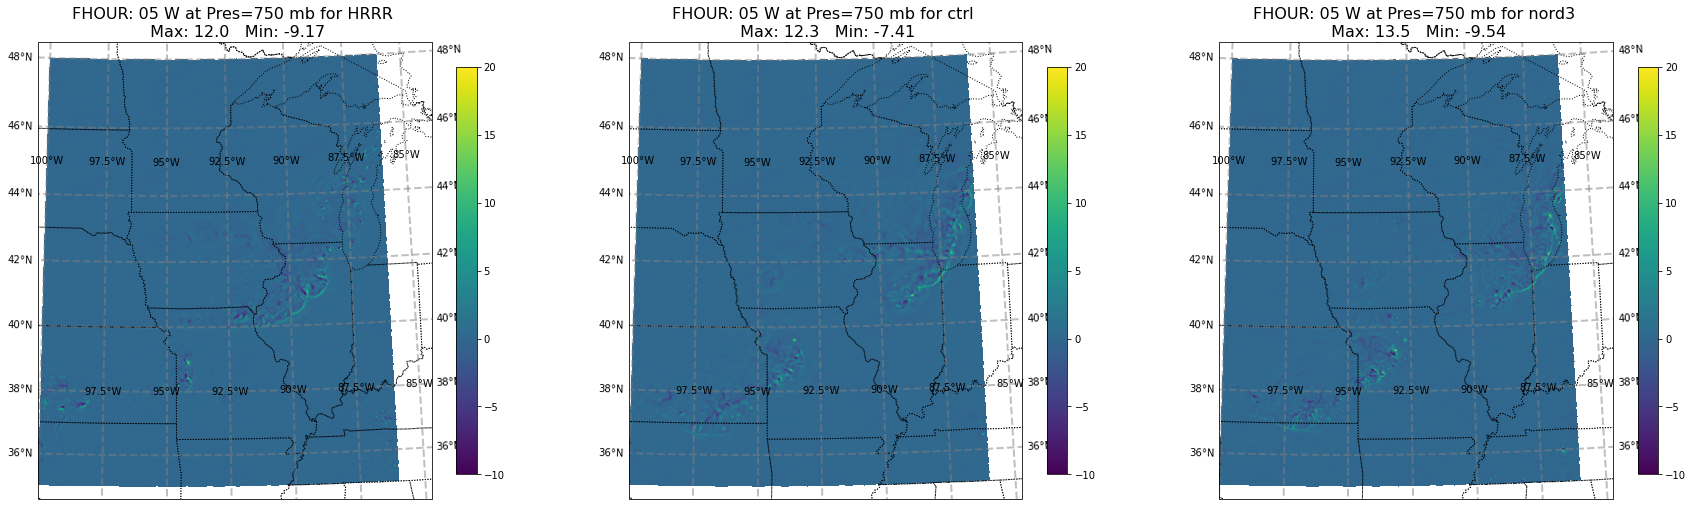

In [2]:
from plot_tools import *

# Set up cartopy stuff here, so the plot routine is already set to use it.

fig, axes = init_cartopy_plot(ncols=3, nrows=1, figsize=(30,10))

# Plot the HRRR and RRFS data

cb_info = plot_w_from_xarray(hrrr, klevel=klevel, title='HRRR', ax = axes[0])

cb_info = plot_w_from_xarray(rrfs0, klevel=klevel, title='ctrl', ax =  axes[1])
cb_info = plot_w_from_xarray(rrfs1, klevel=klevel, title='nord3', ax = axes[2])


In [3]:
hrrr_u = np.nan_to_num(hrrr.U.isel(nz=klevels).values).astype('float64')
hrrr_v = np.nan_to_num(hrrr.V.isel(nz=klevels).values).astype('float64')
hrrr_w = np.nan_to_num(hrrr.W.isel(nz=klevels).values).astype('float64')

#hrrrw_w = hrrr_w.mean(axis=0)

rrfs0_u = np.nan_to_num(rrfs0.U.isel(nz=klevels).values).astype('float64')
rrfs0_v = np.nan_to_num(rrfs0.V.isel(nz=klevels).values).astype('float64')
rrfs0_w = np.nan_to_num(rrfs0.W.isel(nz=klevels).values).astype('float64')

rrfs1_u = np.nan_to_num(rrfs1.U.isel(nz=klevels).values).astype('float64')
rrfs1_v = np.nan_to_num(rrfs1.V.isel(nz=klevels).values).astype('float64')
rrfs1_w = np.nan_to_num(rrfs1.W.isel(nz=klevels).values).astype('float64')

print(hrrr_w.shape)

(6, 5, 501, 424)



----------------------
get_spectraND called
----------------------

get_spectraND:  Reshaped array so that spectra averaged over outer dimension: 30

kvals:  (212,) [  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5
  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5
  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5  47.5
  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5  59.5
  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5  71.5
  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5  83.5
  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5  95.5
  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5
 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5
 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5
 132.5 133.5 134.5 135.5 136.5 

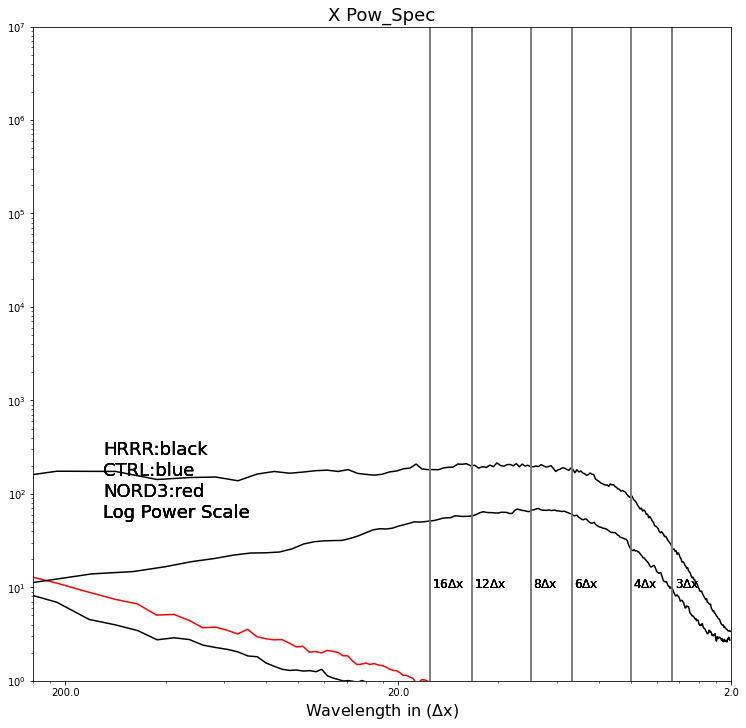

In [19]:
from spectra.py_spectra import *

fig = plt.figure(constrained_layout=True,figsize=(20,10))

ylim = 1e7
axis = 0
func = get_spectra2D_POWSPEC

gs = gridspec.GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])

# plot_spectra(rrfs0_w, func=get_spectra2D_RAD, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim], debug=True)
plot_spectra(rrfs1_w, func=func, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim], debug=True)
plot_spectra(hrrr_w,  func=get_spectra2D_RAD, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'Radial Pow_Spec', ylim=[1,ylim])

# ax1 = fig.add_subplot(gs[0, 1])

# plot_spectra(rrfs0_w, func=get_spectra2D_RAD, axis=axis, ax=[ax1], legend='', PScolor='b', ylim=[1,ylim])
# plot_spectra(rrfs1_w, func=get_spectra2D_RAD, axis=axis, ax=[ax1], legend='', PScolor='r', ylim=[1,ylim])
plot_spectra(hrrr_w,  func=get_spectra2D_POWSPEC, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'X Pow_Spec', ylim=[1,ylim])
plot_spectra(hrrr_w,  func=get_spectra2D_AVG, axis=axis, ax=[ax1], legend='HRRR:black\nCTRL:blue\nNORD3:red', ptitle = 'X Pow_Spec', ylim=[1,ylim])

plt.show()